<a href="https://colab.research.google.com/github/agfernandezb/ML2021I/blob/main/Entregable_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random as ran
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import sklearn
from sklearn import datasets

Ejercicios Aprendizaje de Maquina

#Ejercicio 2.2 

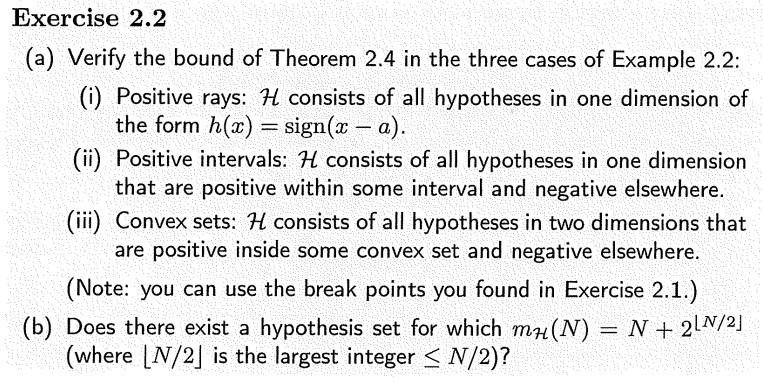

##(a)

###(i)

En este caso $m_H(N) = N+1$, para $k = 2$, $m_H(2) = 3 < 2^2 = 4$, entonces: 
$$m_H(n) = N + 1 \leq  N + 1 = {{N}\choose{1}} +  {{N}\choose{0}}$$ 

###(ii)

Aquí $m_H(N) = \frac{1}{2}N^2+\frac{1}{2}N+1$, tome $k = 3$ luego $m_H(3) = 7 < 8 = 2^3$ , así tenemos que:
$$N = 1, m_H(1) = 1 < 2 = {{1}\choose{0}} + {{1}\choose{1}}$$  
$$N \geq 2, m_H(n) = \frac{1}{2}N^2+\frac{1}{2}N+1 \leq  \frac{N^2 + N}{2} + 1= \frac{N(N-1)}{2} + N + 1 = {{N}\choose{2}}+{{N}\choose{1}} +  {{N}\choose{0}}$$ 

###(iii)

Ahora, $m_H(N) = 2^N$, como no se cumple la hipotésis requerida en el teorema $2.4$ para ningún valor de $k$,  no podemos aplicar el teorema.

##(b)

No puede existir y para demostarlo lo haremos por reducción al absurdo y ver que la existencia de tal conjunto de hipotésis contradice al teorema $2.4$.
Si existiera $H$ tal que $m_H(N) = N + 2^{[\frac{N}{2}]}$ luego para $N = 2$, se tendría $m_H(2) = 2 + 2^0 = 3 < 2^2 = 4$. 
Por teorema $2.4$ entonces:
$$m_H(n) = N + 2^{[\frac{N}{2}]}\leq N + 1 = {{N}\choose{1}} +  {{N}\choose{0}}$$
Es decir $2^{[\frac{N}{2}]}\leq 1$, lo cual no es válido tomando cualquier $N$ entero mayor a $3$. Al contradicer el teorema, verificamos que no puede existir tal conjunto de hipotésis.


#Ejercicio 2.5

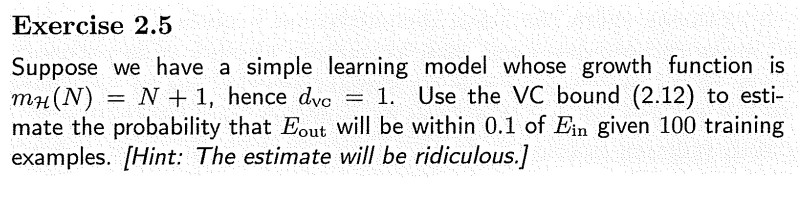

De la ecuación $2.12$ despejamos a $\delta$ obteniendo:
$$\delta = \frac{4m_H(2N)}{e^{\frac{N(0,1)^2}{8}}}$$

In [2]:
N = 100
mh = 2*N + 1
dif = 0.1**2
delta = 4*mh/np.exp(N*dif/8)
print("Delta es", delta)

Delta es 709.5275096780147


La probabilidad es mayor o igual a $1 - \delta$, puesto que $\delta$ es bastante mayor a $1$ esta cota solo nos dice que la probabilidad es mayor  o igual a $0$.

#Ejercicio 2.6

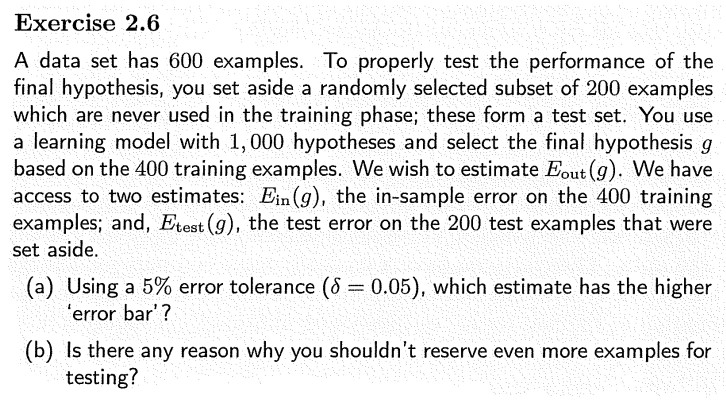

###(a)


(a) Primero tomamos la cota de generalización  $(2.1)$
$E_{out}(g) \leq E_{in}(g) + \sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}$. \\
Para calcular $E_{test}(g)$ basta con tomar $M = 1$ puesto que solo tenemos $1$ hipotésis, así tenemos que:


In [3]:
def cota(M,N,eps):
  return np.sqrt(np.log(2*M/eps)/2/N)
#test
M = 1
N = 200
eps = 0.05
print('E_ test: ', cota(M,N,eps))
M = 1000
N = 400
print('E_in: ', cota(M,N,eps))

E_ test:  0.09603227913199208
E_in:  0.11509037065006825


Vemos que el error es mas grande dentro de las muestras tomadas  (sample) que para el conjunto con el que verificamos la hipotésis (test).

###(b) 


Si dividimos nuestro data set de forma que gran parte de los datos sean designados para probar la hipotésis, puede ocurrir que nuestro training set sea demasiado pequeño como para obtener una buena hipotésis. Como vemos abajo, si el test set es muy grande, el error dentro del training set puede llegar a aumentar bastante.

In [4]:
def cota(M,N,eps):
  return np.sqrt(np.log(2*M/eps)/2/N)
#test
M = 1
N = 500
eps = 0.05
print('E_ test: ', cota(M,N,eps))
M = 1000
N = 100
print('E_in: ', cota(M,N,eps))

E_ test:  0.060736146190830516
E_in:  0.2301807413001365


#Problema 2.1


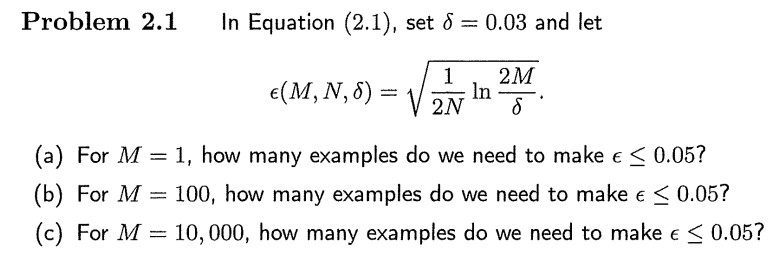

Despejamos $N$ de la ecuación, obteniendo la siguiente desigualdad:
$$N \geq \frac{1}{2 \epsilon^2}ln(\frac{2M}{\delta})$$

###(a) $M = 1$


In [5]:
M = 1
delta = 0.03
eps = 0.05
N = 1/(2*eps**2)*np.log(2*M/delta)
N

839.9410155759854

Requerimos que M sea mayor o igual a $840$.

##(b) $M = 10$

In [6]:
M = 100
delta = 0.03
eps = 0.05
N = 1/(2*eps**2)*np.log(2*M/delta)
N

1760.9750527736035

Requerimos que M sea mayor o igual a $1761$.

##(c) $M = 10,000$

In [7]:
M = 10000
delta = 0.03
eps = 0.05
N = 1/(2*eps**2)*np.log(2*M/delta)
N

2682.009089971222

Requerimos que M sea mayor o igual a $2683$.

#Problema 2.12


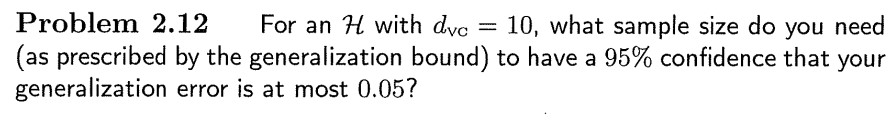

Utilizamos la cota del error de generalización, 
$$N \geq \frac{8}{\epsilon^2}\ln{\frac{4m_H{(2N)}}{\delta}}$$
Para acotar a $m_H(n)$ utilizamos la desigualdad $2.10$ que se puede demostrar por inducción:
$$m_H(n) \leq N^{d_{vc}} + 1$$
Finalmente tenemos:
$$N \geq \frac{8}{\epsilon^2}\ln{\frac{4((2N)^{10} + 1)}{\delta}}$$
La idea es tomar un valor inicial para $N$ y aplicarlo en la desigualdad para ir obteniendo más valores de $N$ con los que poder acotar el valor de $N$.

In [8]:
dvc = 10
ep = 0.05
delta = 1 - 0.95

def desigualdad(N, tol = 1,  iter= 100):
    for i in range(iter):
        new_n = (8/(ep**2))* np.log(4*(((2*N)**dvc + 1)/delta))
        if np.abs(new_n - N) < tol:
            break
        N = new_n
    return N
print(desigualdad(100,1,1000))

452956.11889346124


Vemos que requerimos que $N \geq 452,957$ un número de muestras ciertamente grande.

#Problema 2.16


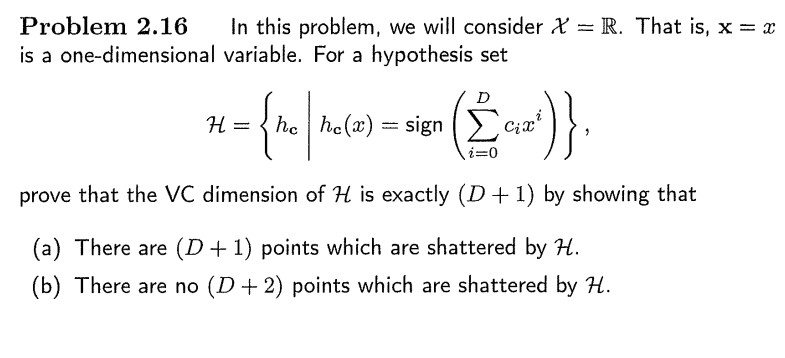

Este problema tiene bastantes semejanzas con el ejercicio $2.4$, usaremos las ideas de resolución de tal ejercicio y resolviendo ambos puntos $a$ y $b$ completaremos la demostración. 

##(a) $d_{vc} \geq D + 1$

La idea es construir una matriz no singular $X$ con la que podamos tomar $y$ cualquier vector de $\{-1,1\}^{D+1}$ y así tomar $c = X^{-1}y$ afortunadamente el ejercicio nos da una pista de esa matriz $X$. $X$ debe ser una matriz tal que dados $D+1$ puntos $x_0,x_1,..,x_{D}$
$$X = \begin{pmatrix}
      1 & x_0 & x_0^2 & \cdots & x_0^D\\
      1 & x_1 & x_1^2 & \cdots & x_1^D \\
      \vdots & \vdots & \vdots &\cdots & \vdots\\
      1 & x_D & x_D^2 & \cdots & x_{D}^D \\
\end{pmatrix}$$
La matriz de Vandermonde, la cual es invertible si todos los puntos $x_0,..,x_D$ son distintos. Así, tomamos $D+1$ puntos distintos podemos tomar $c$ como se mencionó y luego para todo vector $y = (y_0,..,y_D)$ ocurre que:
$$\sum_{i=0}^{D}c_ix_k^i$$ es equivalente a multiplicar la k-ésima fila de $X$ por el vector $c$ que nos da como resultado la k-ésima componente del vector $y$. Así, concluimos que esos $D+1$ puntos son quebrados o partidos por nuestro conjunto de hipotésis $H$.

##(b) $d_{vc} \leq D + 1$

Dados $D+2$ puntos $x_0,x_1,..,x_{D+1}$ vemos que si consideramos el conjunto de $D+2$ vectores de dimensión $D+1$ donde cada vector corresponde a las potencias de cada punto, es decir, $(1,x_i,x_i^2,...,x_i^D)$ para $i = 0,..,{D+1}$. Este conjunto de vectores no es linealmente independiente al tener $D+2$ vectores, es decir, uno de ellos debe ser una combinación lineal del resto de ellos, donde no todas las constantes pueden ser $0$. Supongamos es el vector de índice $D+1$:
$$
(1,x_{D+1},...,x_{D+1}^{D}) = \sum_{i \neq {D+1}} \lambda_i(1,x_i,...,x_i^D)
$$
Para la dicotomía a elegir tomamos $y = (y_0,..,y_{D+1})$ donde $y_i = signo(\lambda_i)$. Si $\lambda_i = 0$ entonces $y_i = 1$. Esto para $i = 0,..,D$. Para $i = D+1$ tomamos $y_i = -1$. Así, supongamos por reducción al absurdo, existe un vector $c$ de dimensión $D+1$ tal que para todo $k$ cumple que:
$$y_k = signo(\sum^{D}_{i=0}c_ix_k^i)$$
Por como definimos $y_k$ ocurre que para todo $\lambda_k \neq 0$, $k \neq {D+1}$
$$\lambda_k*\sum^{D}_{i=0}c_ix_k^i > 0$$
Además, para $k = D+1$,
$$\sum_{i=0}^D c_ix_{D+1}^i =\sum_{k \neq {D+1}}\sum_{i=0}^D c_i\lambda_k x_k^i > 0$$ por lo anterior. Luego $y_{D+1} = signo(\sum_{i=0}^D c_ix_{D+1}^i) = 1$ lo cual es una contradicción puesto que definimos a $y_{D+1}$ como $-1$. Luego, esos $D+2$ puntos que tomamos no logran ser quebrados por nuestro conjunto de hipotésis $H$ ya que existen dicotomias que no se pueden generar. Así, obtenemos que $d_{vc} \leq D + 1$.

Finalmente por los literales $a$ y $b$ se tiene que $d_{vc} = D + 1$.

#Problema 2.20


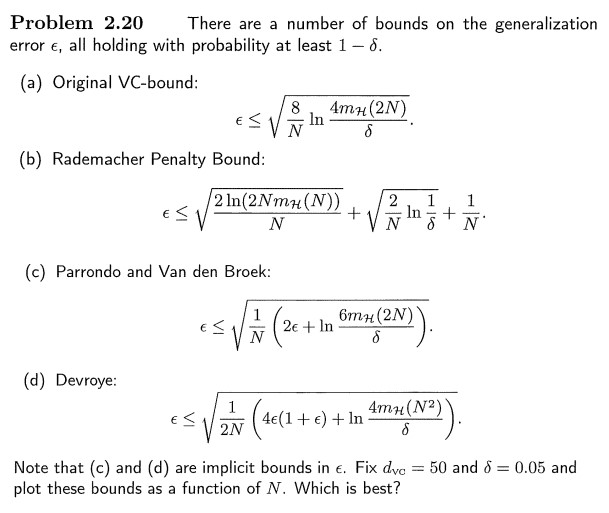

Dentro de las cuatro cotas, vemos que las dos últimas: (c) y (d), requieren de despejar primero a $\epsilon$. Para ello, primero elevamos al cuadrado en ambas ecuaciones y despejamos, obteniendo: \\
c) Parrondo y Van den Broek

$$\epsilon^2 \leq \frac{1}{N}(2\epsilon  + \ln{\frac{6m_{H}(2N)}{\delta}})$$

De allí despejamos $\epsilon$, tal que
$$N\epsilon^2 - 2\epsilon \leq \ln{\frac{6m_{H}(2N)}{\delta}}$$
Al hallar sus raíces y notar que $N \geq 0$ finalmente obtenemos que: 
$$\epsilon \leq \frac{1}{N} + \frac{\sqrt{4+4N(\ln{\frac{6m_{H}(2N)}{\delta}})}}{2N}$$
d) Devroye:
$$\epsilon^2 \leq \frac{1}{2N}(4\epsilon(1+\epsilon)  + \ln{\frac{4m_{H}(N^2)}{\delta}})$$
Prosiguiendo de forma similar obtenemos así:
$$\epsilon \leq \frac{1}{N-2} + \frac{\sqrt{4 + (2N-4)(\ln{\frac{4m_{H}(N^2)}{\delta}})}}{2N-4} $$

Para acotar a $m_H(n)$ utilizamos la desigualdad $2.10$ que se puede demostrar por inducción:
$$m_H(n) \leq N^{d_{vc}} + 1$$

Resultados


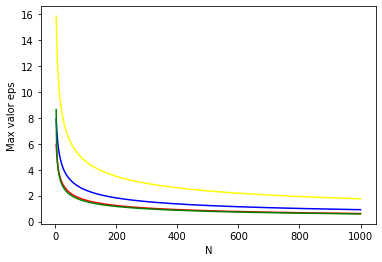

In [9]:
def cota(n, dvc = 50):
  return np.power(n,dvc) + 1
delta = 0.05
def vc(N):
    return np.sqrt(8*np.log(4*cota(2*N)/delta)/N)

def rademacher(N):
    x = np.sqrt(2*np.log(2*N*cota(N))/N)
    y = np.sqrt(2*np.log(1/delta)/N)
    z = 1/(N+0.0)
    return x + y + z

def parrondo(N):
    x = 1/(N+0.0)
    y = np.sqrt(4 + 4*N*(np.log(6*cota(2*N)/delta)))/(2*N)
    return x + y

def devroye(N):
    x = 1/(N-2)
    y = np.sqrt(4 +(2*N-4)*(np.log(4*cota(N**2)/delta)))/(2*N - 4)
    return x + y
x = np.linspace(3,1000,2000)
y1 = np.zeros(2000)
y2 = np.zeros(2000)
y3 = np.zeros(2000)
y4 = np.zeros(2000)
for i in range(2000):
  y1[i] = vc(x[i])
  y2[i] = rademacher(x[i])
  y3[i] = parrondo(x[i])
  y4[i] = devroye(x[i])
plt.plot(x, y1, color='yellow', label='VC')
plt.plot(x, y2, color='blue', label='Rademacher')
plt.plot(x, y3, color='red', label='Parrondo y Van den Broek')
plt.plot(x, y4, color='green', label='Devroye')
plt.xlabel('N')
plt.ylabel('Max valor eps')
print('Resultados')

Vemos que las cotas de Parrondo y Van den Broek junto a la coya de Devroye son más precisas durante todos los valores de $N$ tomados. 
Para ver cual cota es mejor haremos una comparación de los valores que toman estos dos para ver cual resulta mas precisa.

In [10]:
x = np.linspace(3,1000,1000)
y1 = np.zeros(1000)
y2 = np.zeros(1000)
cota1 = 0
cota2 = 0
for i in range(1000):
  y1[i] = parrondo(x[i])
  y2[i] = devroye(x[i])
  if y1[i] > y2[i]:
     cota2 += 1
  elif y1[i] < y2[i]:
     cota1 += 1
print(cota1, cota2)

6 994


Así vemos que la mejor cota para $\epsilon$ es la de Devroye, a pesar de que en algunos valores pequeños de N sea mejor la de Parrondo y Van den Broek.